# Table of Contents for 4.10 Coding Etiquette and Excel Reporting
    Import libraries, set path, import file (orders_products_customers.pkl)
    Perform checks (shape, columns, head)
    Define region_map fto create a Region column based on the state column by regions: Northeast, Midwest, South, West
        Get value_counts for STATE and Region
    Determine whether there’s a difference in spending habits between the different U.S. regions
        Create region_spending variable using a cross of Region and spending_flag columns
        Create a bar chart plotting Region vs. percentage of spending_flag 
        Save as plot
        Export as spending_habits_by_region.png
        Get the value_counts for spending_flag
    Create a low_activity_flag for low-activity customers (with less than 5 orders)
        Exlude these customers from the data (rows: 24414877)
        Export as final.pkl
    Create a list for profile_customer to apply as a column profile on df : 
        Young single adult, Young parent, Affluent professional, Busy family, Senior shopper and General shopper
        Get the profile value_counts
        Create a visualization to show the distribution of profiles
            Save as plot_1.  
            Export as distribution_customer_profiles.png
    Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
    Compare by region using crosstab and percentages 
        Visualize as plot_2
        Export as customer_profile_by_region.png
    Compare by department using crosstab and percentages
        Visualize as plot_3
        Export as customer_profile_by_department.png
        Create a department_map to switch the department numbers to their respective department names
        Viaualiza again as plot_3a
        Export as customer_profile_by_department_labeled.png
    Export the final_active df as final_active.pkl   
    

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Set path

In [2]:
path = r'C:\Users\valev\Desktop\0325 Instacart Basket Analysis'

# Import files

In [3]:
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl' ))

# Check file

In [4]:
df_final.shape

(32404859, 30)

In [5]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spent', 'spending_flag',
       'median_days_since_orders', 'order_frequency_flag', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [6]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,median_days_since_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,1107,38259,2,1,11,...,30.0,Non-frequent customer,Female,District of Columbia,68,6/30/2019,2,married,142744,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,5319,196224,65,1,14,...,1.0,Frequent customer,Male,New York,48,4/29/2018,2,married,43906,both
2,1,Chocolate Sandwich Cookies,61,19,5.800781,7540,138499,8,0,14,...,7.0,Frequent customer,Female,Massachusetts,31,3/11/2017,2,married,78505,both
3,1,Chocolate Sandwich Cookies,61,19,5.800781,9228,79603,2,2,10,...,30.0,Non-frequent customer,Male,Tennessee,65,10/27/2019,1,married,51010,both
4,1,Chocolate Sandwich Cookies,61,19,5.800781,9273,50005,1,1,15,...,7.0,Frequent customer,Male,New Jersey,75,4/9/2019,3,married,115468,both


# Create region column based on the state column by regions: Northeast, Midwest, South, West

In [7]:
# Define region mapping with full state names
region_map = {
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast',
    
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest', 
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 
    'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South', 
    'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South', 
    'District of Columbia': 'South', 'West Virginia': 'South', 'Alabama': 'South', 
    'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South', 
    'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West', 
    'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West', 
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'
}

In [8]:
# Create Region column
df_final['Region'] = df_final['STATE'].map(region_map)

In [9]:
df_final.shape

(32404859, 31)

In [10]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge,Region
0,1,Chocolate Sandwich Cookies,61,19,5.800781,1107,38259,2,1,11,...,Non-frequent customer,Female,District of Columbia,68,6/30/2019,2,married,142744,both,South
1,1,Chocolate Sandwich Cookies,61,19,5.800781,5319,196224,65,1,14,...,Frequent customer,Male,New York,48,4/29/2018,2,married,43906,both,Northeast
2,1,Chocolate Sandwich Cookies,61,19,5.800781,7540,138499,8,0,14,...,Frequent customer,Female,Massachusetts,31,3/11/2017,2,married,78505,both,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.800781,9228,79603,2,2,10,...,Non-frequent customer,Male,Tennessee,65,10/27/2019,1,married,51010,both,South
4,1,Chocolate Sandwich Cookies,61,19,5.800781,9273,50005,1,1,15,...,Frequent customer,Male,New Jersey,75,4/9/2019,3,married,115468,both,Northeast


In [11]:
df_final['STATE'].value_counts()

STATE
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [12]:
df_final['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag

In [13]:
# Create a cross-tab to compare Region and spending_flag
region_spending = pd.crosstab(df_final['Region'], df_final['spending_flag'], normalize='index') * 100

# Display the result
print(region_spending)


spending_flag  High spender  Low spender
Region                                  
Midwest            0.385254    99.614746
Northeast          0.325404    99.674596
South              0.374791    99.625209
West               0.376888    99.623112


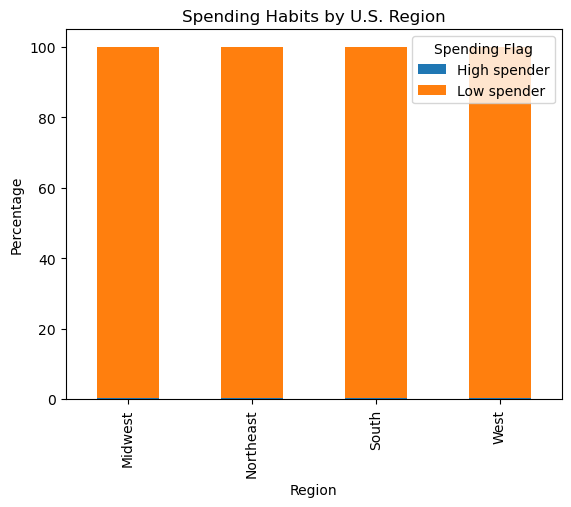

In [14]:
plot = region_spending.plot(kind='bar', stacked=True)
plt.title('Spending Habits by U.S. Region')
plt.ylabel('Percentage')
plt.xlabel('Region')
plt.legend(title='Spending Flag')
plt.show()


In [15]:
df_final['spending_flag'].value_counts()

spending_flag
Low spender     32285266
High spender      119593
Name: count, dtype: int64

# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
# Create column 'low_activity_flag'
df_final['low_activity_flag'] = df_final['order_number'].apply(lambda x: 'Yes' if x < 5 else 'No')


In [17]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge,Region,low_activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.800781,1107,38259,2,1,11,...,Female,District of Columbia,68,6/30/2019,2,married,142744,both,South,Yes
1,1,Chocolate Sandwich Cookies,61,19,5.800781,5319,196224,65,1,14,...,Male,New York,48,4/29/2018,2,married,43906,both,Northeast,No
2,1,Chocolate Sandwich Cookies,61,19,5.800781,7540,138499,8,0,14,...,Female,Massachusetts,31,3/11/2017,2,married,78505,both,Northeast,No
3,1,Chocolate Sandwich Cookies,61,19,5.800781,9228,79603,2,2,10,...,Male,Tennessee,65,10/27/2019,1,married,51010,both,South,Yes
4,1,Chocolate Sandwich Cookies,61,19,5.800781,9273,50005,1,1,15,...,Male,New Jersey,75,4/9/2019,3,married,115468,both,Northeast,Yes


In [18]:
df_final.shape

(32404859, 32)

In [19]:
# Exclude low activity users from dataframe
df_final_active = df_final[df_final['low_activity_flag'] == 'No']

In [20]:
df_final_active.shape

(24414877, 32)

# Export files

In [21]:
# Export file
df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final.pkl'))

# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [22]:
df_final_active.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spent', 'spending_flag',
       'median_days_since_orders', 'order_frequency_flag', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'Region', 'low_activity_flag'],
      dtype='object')

## Create a list for profile_customer to apply as a column profile on df : Young single adult, Young parent, Affluent professional, Busy family, Senior shopper and General shopper

In [23]:
def profile_customer(row):
    age = row['Age']
    income = row['income']
    dept = row['department_id']
    dependents = row['n_dependants']
    
    if age < 30 and income < 40000 and dependents == 0:
        return 'Young Single Adult'
    elif age < 35 and dependents > 0 and dept in [18, 4, 16]:  # dept: baby, produce, dairy
        return 'Young Parent'
    elif 30 <= age < 60 and income >= 80000 and dependents == 0:
        return 'Affluent Professional'
    elif dependents >= 2 and dept in [19, 17, 7]:  # dept: snacks, household, beverages
        return 'Busy Family'
    elif age >= 60:
        return 'Senior Shopper'
    else:
        return 'General Shopper'


In [24]:
df_final_active['profile'] = df_final_active.apply(profile_customer, axis=1)

C:\Users\valev\AppData\Local\Temp\ipykernel_21584\3229360510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_active['profile'] = df_final_active.apply(profile_customer, axis=1)


In [25]:
df_final_active.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,STATE,Age,date_joined,n_dependants,fam_status,income,_merge,Region,low_activity_flag,profile
1,1,Chocolate Sandwich Cookies,61,19,5.800781,5319,196224,65,1,14,...,New York,48,4/29/2018,2,married,43906,both,Northeast,No,Busy Family
2,1,Chocolate Sandwich Cookies,61,19,5.800781,7540,138499,8,0,14,...,Massachusetts,31,3/11/2017,2,married,78505,both,Northeast,No,Busy Family
5,1,Chocolate Sandwich Cookies,61,19,5.800781,9696,108919,46,5,16,...,Massachusetts,34,12/12/2018,0,single,93561,both,Northeast,No,Affluent Professional
7,1,Chocolate Sandwich Cookies,61,19,5.800781,11485,170451,5,5,18,...,District of Columbia,80,4/12/2017,1,married,47464,both,South,No,Senior Shopper
8,1,Chocolate Sandwich Cookies,61,19,5.800781,12672,106854,28,5,10,...,District of Columbia,19,10/14/2017,2,living with parents and siblings,93441,both,South,No,Busy Family


In [26]:
df_final_active['profile'].value_counts()

profile
General Shopper          10257574
Senior Shopper            7506622
Busy Family               2388831
Young Parent              2334450
Affluent Professional     1847000
Young Single Adult          80400
Name: count, dtype: int64

# Create an appropriate visualization to show the distribution of profiles.

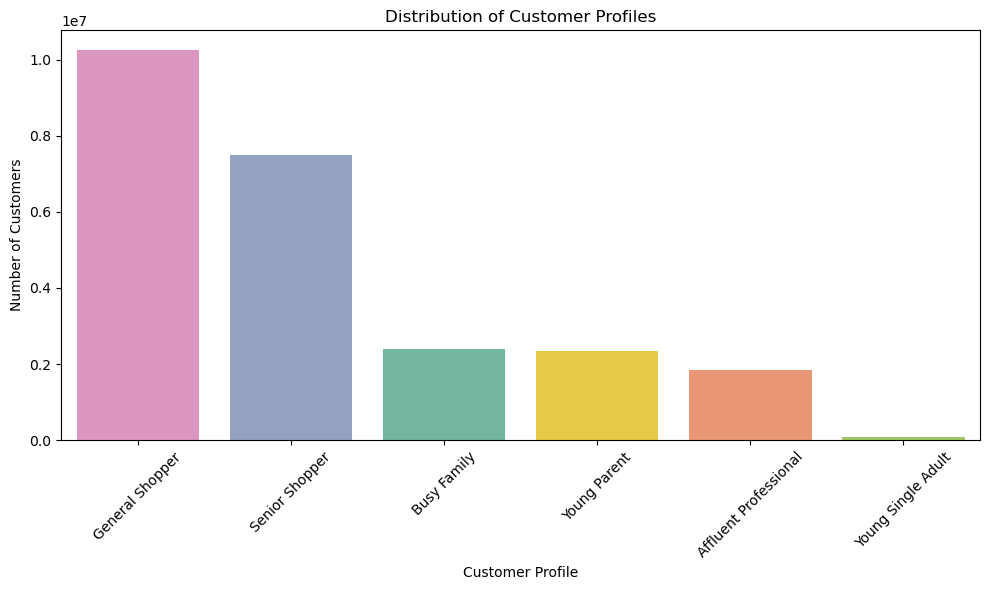

In [27]:
plot_1 = plt.figure(figsize=(10,6))
sns.countplot(data=df_final_active, x='profile', hue='profile', legend=False,
              order=df_final_active['profile'].value_counts().index, palette='Set2')
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Wow, well, this is pretty cool.  Thanks to ChatGPT.

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

## To aggregate values for order_number frequency and average_spent by customer profile using the groupby method followed by agg.

In [28]:
agg_profile = df_final_active.groupby('profile').agg({
    'order_number': ['max', 'mean', 'min'],
    'average_spent': ['max', 'mean', 'min']
}).round(2)

print(agg_profile)


                      order_number            average_spent            
                               max   mean min           max  mean   min
profile                                                                
Affluent Professional           99  22.11   5         16.29  7.95  5.19
Busy Family                     99  21.73   5         17.62  7.59  1.00
General Shopper                 99  21.85   5         20.11  7.79  1.00
Senior Shopper                  99  21.94   5         19.41  7.82  1.30
Young Parent                    99  22.55   5         14.43  7.84  1.77
Young Single Adult              99  20.89   5          7.00  6.49  2.60


# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## Compare by region using crosstab and percentages

In [29]:
region_profile_ct = pd.crosstab(df_final_active['Region'], df_final_active['profile'], normalize='index') * 100
print(region_profile_ct.round(2))

profile    Affluent Professional  Busy Family  General Shopper  \
Region                                                           
Midwest                     7.92         9.65            42.26   
Northeast                   7.01        10.06            41.97   
South                       7.43         9.75            42.06   
West                        7.80         9.76            41.76   

profile    Senior Shopper  Young Parent  Young Single Adult  
Region                                                       
Midwest             30.38          9.50                0.28  
Northeast           31.08          9.56                0.33  
South               30.73          9.70                0.33  
West                30.87          9.44                0.38  


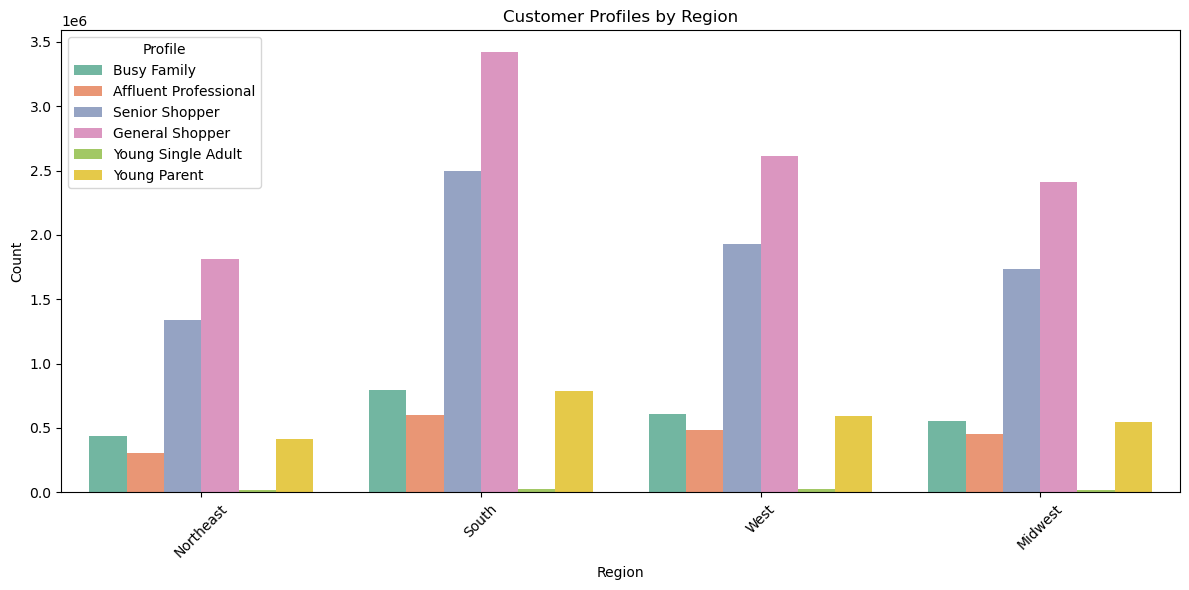

In [30]:
plot_2 = plt.figure(figsize=(12, 6))
sns.countplot(data=df_final_active, x='Region', hue='profile', palette='Set2')
plt.title('Customer Profiles by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Profile')
plt.tight_layout()
plt.show()

## Compare by department using crosstab and percentages

In [31]:
dept_profile_ct = pd.crosstab(df_final_active['department_id'], df_final_active['profile'], normalize='index') * 100
print(dept_profile_ct.round(2))

profile        Affluent Professional  Busy Family  General Shopper  \
department_id                                                        
1                               7.67         0.00            57.67   
2                               7.80         0.00            58.22   
3                               7.79         0.00            57.83   
4                               7.73         0.00            37.92   
5                               9.42         0.00            57.45   
6                               7.92         0.00            58.08   
7                               7.24        50.05            25.27   
8                               8.24         0.00            57.04   
9                               7.80         0.00            57.94   
10                              7.07         0.00            58.18   
11                              7.41         0.00            58.46   
12                              7.96         0.00            57.48   
13                  

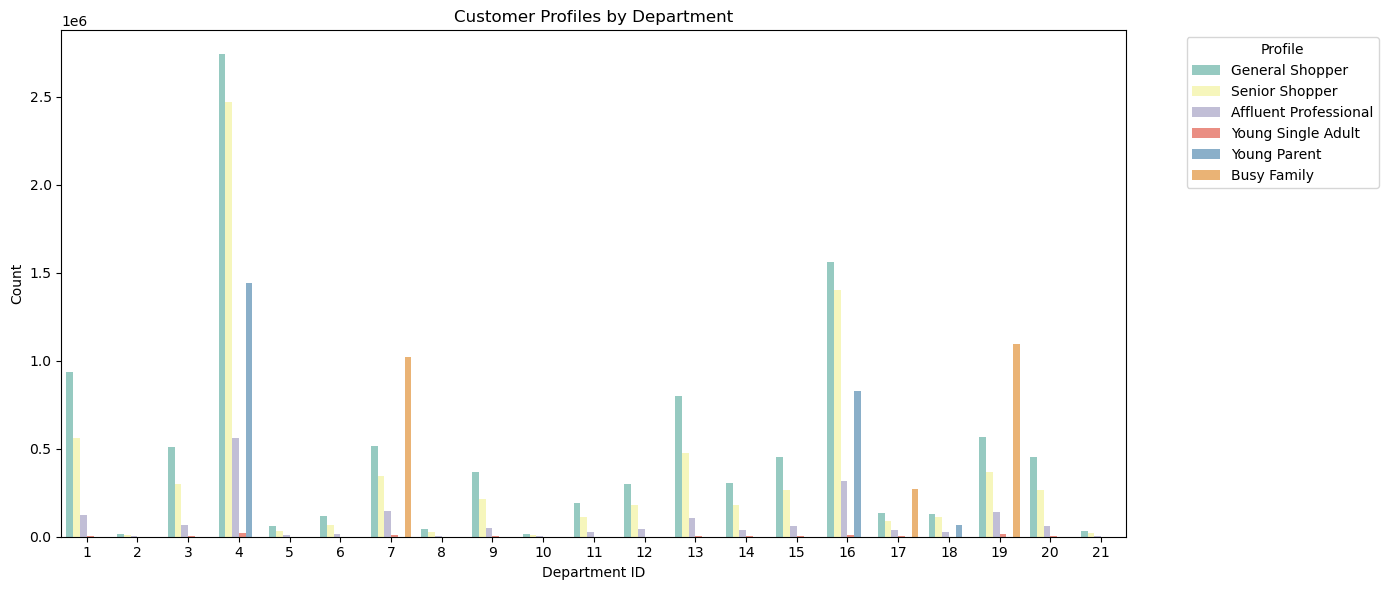

In [32]:
plot_3 = plt.figure(figsize=(14, 6))
sns.countplot(data=df_final_active, x='department_id', hue='profile', palette='Set3')
plt.title('Customer Profiles by Department')
plt.ylabel('Count')
plt.xlabel('Department ID')
plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
# Create mapping dictionary
department_map = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol',
    6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta',
    10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry',
    14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household',
    18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'
}

# Apply mapping
df_final_active['department'] = df_final_active['department_id'].map(department_map)

C:\Users\valev\AppData\Local\Temp\ipykernel_21584\433591713.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_active['department'] = df_final_active['department_id'].map(department_map)


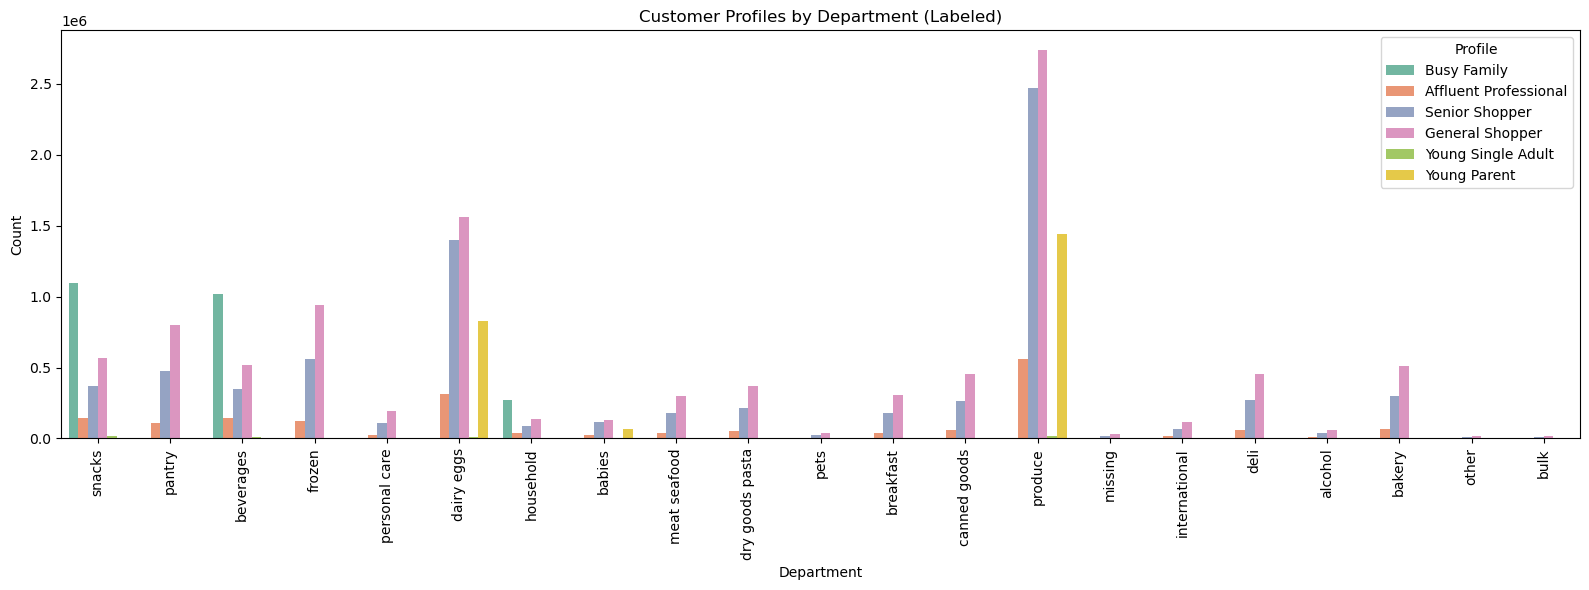

In [41]:
plot_3_a = plt.figure(figsize=(16, 6))
sns.countplot(data=df_final_active, x='department', hue='profile', palette='Set2')
plt.xticks(rotation=90)
plt.title('Customer Profiles by Department (Labeled)')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Profile')
plt.tight_layout()
plt.show()

## There is a regional effect on profile behavior. For instance, the South leans more toward Busy Families and General Shoppers, while the Northeast and West see a stronger presence of Affluent Professionals.
## Produce is bought mostly by general, senior shoppers and young parent.   Busy families buy more snacks and beverages.  Young single adult do not appear to make many purchases, whereas the Affluent professional spends more accross departments following the general and senior shopper.  Young parents spend more on produce and dairy.  

# Export visualizations

In [42]:
plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_habits_by_region.png'))

In [43]:
plot_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_customer_profiles.png'))

In [44]:
plot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_by_region.png'))

In [45]:
plot_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_by_department.png'))

In [46]:
plot_3_a.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_by_department_labeled.png'))

# Export active file

In [47]:
df_final_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_active.pkl'))